In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/creditcard/creditcard.csv')

# Viewing the statitical features of the data for further preprocessing
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Goal of this tab is to slice the dataset into 2 - X with all the features and y with the target 'Class'
X = dataset.drop(columns = 'Class')
y = dataset['Class']

X, y

feature_names = list(X.columns)
feature_names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
# Performing Bayesian Normalisation on the dataset as a step of preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [ ]:
# Defining the preprocessing pipeline
oversample = SMOTE(sampling_strategy=0.1)  # Oversample minority class to 10% of the majority class
undersample = RandomUnderSampler(sampling_strategy=1)  # Undersample majority class to the same number as the minority class

pipeline = Pipeline(steps=[('o', oversample), ('u', undersample)])

print(pipeline)

# Applying the pipeline to the training data
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Verifying the class distribution after resampling
print(f"Class distribution before resampling: {pd.Series(y).value_counts()}")
print(f"Class distribution after resampling: {pd.Series(y_resampled).value_counts()}")

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=1))])
Class distribution before resampling: Class
0    284315
1       492
Name: count, dtype: int64
Class distribution after resampling: Class
0    28431
1    28431
Name: count, dtype: int64


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle = True, random_state=42)

In [ ]:
# Converting to float32 for MLP
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reshape data for CNN from MLP data
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

### Hyperparameter Tuning and Evaluation of CNN Model

In [ ]:
def cnn_builder(hp):
    model = Sequential()
    # Defining the regularizer type as a hyperparameter
    regularizer_type = hp.Choice('regularizer', ['l1', 'l2'])
    # Applying regularizer based on the choice
    if regularizer_type == 'l1':
        reg = l1(0.01)
    else:
        reg = l2(0.01)
    model.add(Conv1D(filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Int('kernel_size_1', min_value=3, max_value=7, step=2),
                     activation='relu',
                     input_shape=(X_train_cnn.shape[1], 1),
                     kernel_regularizer=reg))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Choice('dropout_1', [0.25, 0.5])))
    model.add(Conv1D(filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Int('kernel_size_2', min_value=3, max_value=7, step=2),
                     activation='relu',
                     kernel_regularizer=reg))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Choice('dropout_2', [0.25, 0.5])))
    model.add(Flatten())
    model.add(Dense(units=hp.Choice('dense_units', [64, 128, 256]),
                    activation='relu',
                    kernel_regularizer=reg))
    model.add(Dropout(hp.Choice('dropout_dense', [0.25, 0.5])))
    model.add(Dense(1, activation='sigmoid'))

    optimizer_type = hp.Choice('optimizer_type', ['adam', 'rmsprop'])
    if optimizer_type == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4]))
    else:
        optimizer = RMSprop(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Installing keras_tuner to perform hyperparameter tuning on the CNN Model

!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

from tensorflow.keras.callbacks import EarlyStopping
# Aplying the RandomSearch method from keras-tuner library to perform hyperparametrer tuning
tuner_cnn = kt.RandomSearch(
    cnn_builder,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='cnn_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Performing RandomSearch for CNN
tuner_cnn.search(X_train_cnn, y_train, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Trial 10 Complete [00h 00m 36s]
val_accuracy: 0.9406462907791138

Best val_accuracy So Far: 0.9925258159637451
Total elapsed time: 00h 08m 29s


In [ ]:
best_hps_cnn = tuner_cnn.get_best_hyperparameters(num_trials=1)[0]

best_hps_cnn.values

{'regularizer': 'l2',
 'filters_1': 32,
 'kernel_size_1': 7,
 'dropout_1': 0.25,
 'filters_2': 64,
 'kernel_size_2': 3,
 'dropout_2': 0.25,
 'dense_units': 256,
 'dropout_dense': 0.5,
 'optimizer_type': 'adam',
 'learning_rate': 0.0001}

In [ ]:
# Building the model with the best hyperparameters
best_model_cnn = cnn_builder(best_hps_cnn)

# Training the model
best_model_cnn.fit(X_train_cnn, y_train, epochs=10, validation_split = 0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1138/1138 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9199 - loss: 3.6150 - val_accuracy: 0.9590 - val_loss: 1.1423
Epoch 2/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9600 - loss: 0.8980 - val_accuracy: 0.9725 - val_loss: 0.4096
Epoch 3/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.3573 - val_accuracy: 0.9726 - val_loss: 0.2235
Epoch 4/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.2123 - val_accuracy: 0.9788 - val_loss: 0.1536
Epoch 5/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9762 - loss: 0.1566 - val_accuracy: 0.9860 - val_loss: 0.1229
Epoch 6/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9785 - loss: 0.1291 - val_accuracy: 0.9872 - val_loss: 0.1040
Epoch 7/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.1127 - val_accuracy: 0.9886 - val_loss: 0.0927
Epoch 8/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.1031 - val_accura

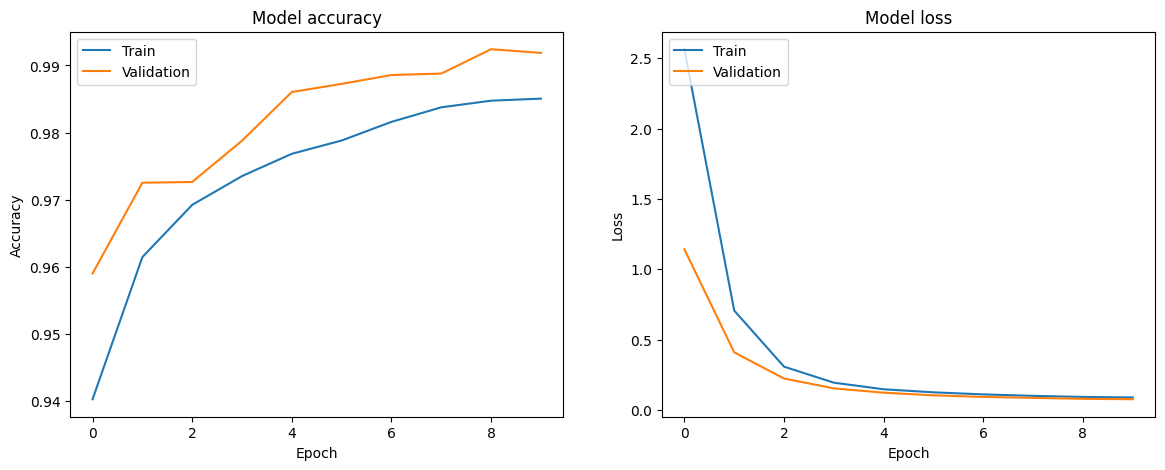

In [ ]:
# Plotting training & validation accuracy values for CNN
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# Accessing the training history using the history attribute of the History object
plt.plot(best_model_cnn.history.history['accuracy'])
plt.plot(best_model_cnn.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
# Accessing the training history using the history attribute of the History object
plt.plot(best_model_cnn.history.history['loss'])
plt.plot(best_model_cnn.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Model Accuracy
loss, accuracy = best_model_cnn.evaluate(X_test_cnn, y_test)
print('Test accuracy:', accuracy)

356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9894 - loss: 0.0760
Test accuracy: 0.9893607497215271


In [ ]:
# Model Predictions for CNN
y_pred = best_model_cnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Classification Report for CNN
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9893607667282159
Confusion Matrix:
[[5606   47]
 [  74 5646]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5653
         1.0       0.99      0.99      0.99      5720

    accuracy                           0.99     11373
   macro avg       0.99      0.99      0.99     11373
weighted avg       0.99      0.99      0.99     11373



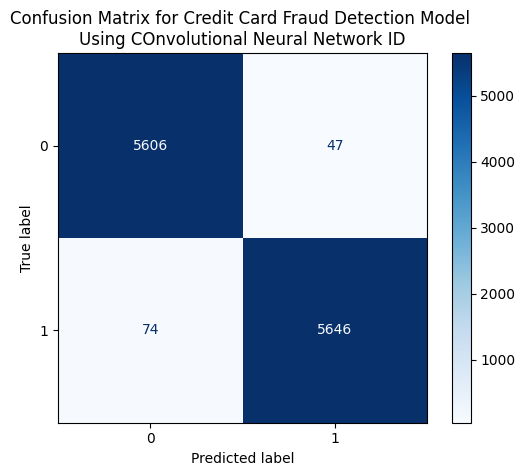

In [ ]:
# Confusion Matrix for CNN
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing COnvolutional Neural Network ID')
plt.show()

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC Score for Hypertuned CNN: {auc_score}')

AUC Score for Hypertuned CNN: 0.9893743837976987


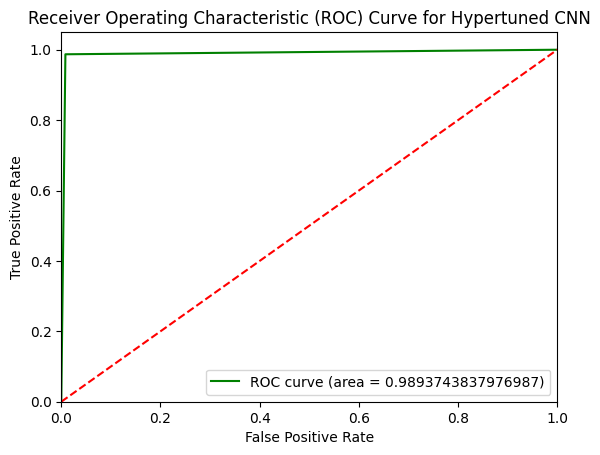

In [ ]:

plt.figure()
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Hypertuned CNN')
plt.legend(loc='lower right')
plt.show()

### Hyperparameter Tuning and Evaluation of MLP Model

In [ ]:
# Convert to float32 for MLP
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
!pip install keras-tuner
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_mlp_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('dense_units_1', min_value=64, max_value=256, step=64),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units_2', min_value=64, max_value=256, step=64),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    else:
        optimizer = RMSprop(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

# Defining the tuner
tuner = kt.RandomSearch(
    build_mlp_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='creditcard_fraud_mlp_TRIAL_2'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Performing the search
tuner.search(X_train, y_train, epochs=10, validation_split = 0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Trial 10 Complete [00h 01m 12s]
val_accuracy: 0.9983512759208679

Best val_accuracy So Far: 0.9986810088157654
Total elapsed time: 00h 11m 44s


In [ ]:
# Best Fit Model
best_hps_mlp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_mlp.values

{'dense_units_1': 256,
 'dropout_1': 0.4,
 'dense_units_2': 128,
 'dropout_2': 0.30000000000000004,
 'optimizer': 'adam',
 'learning_rate': 0.001212158724708745}

In [ ]:
# Getting the best fit model
best_mlp_model = tuner.hypermodel.build(best_hps_mlp)
history = best_mlp_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[EarlyStopping(monitor='val_loss', patience=1)])

print(best_mlp_model.summary())

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1138/1138 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9416 - loss: 0.1345 - val_accuracy: 0.9847 - val_loss: 0.0434
Epoch 2/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9854 - loss: 0.0428 - val_accuracy: 0.9942 - val_loss: 0.0196
Epoch 3/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9916 - loss: 0.0269 - val_accuracy: 0.9964 - val_loss: 0.0130
Epoch 4/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0206 - val_accuracy: 0.9970 - val_loss: 0.0107
Epoch 5/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9950 - loss: 0.0180 - val_accuracy: 0.9973 - val_loss: 0.0099
Epoch 6/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9963 - loss: 0.0127 - val_accuracy: 0.9975 - val_loss: 0.0098
Epoch 7/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9960 - loss: 0.0150 - val_accuracy: 0.9974 - val_loss: 0.0103


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,885 (480.02 KB)

 Trainable params: 40,961 (160.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,924 (320.02 KB)

None


In [ ]:
# Accuarcy for the MLP Model
eval_result = best_mlp_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0097
Test Loss: 0.008916324935853481, Test Accuracy: 0.9978018403053284


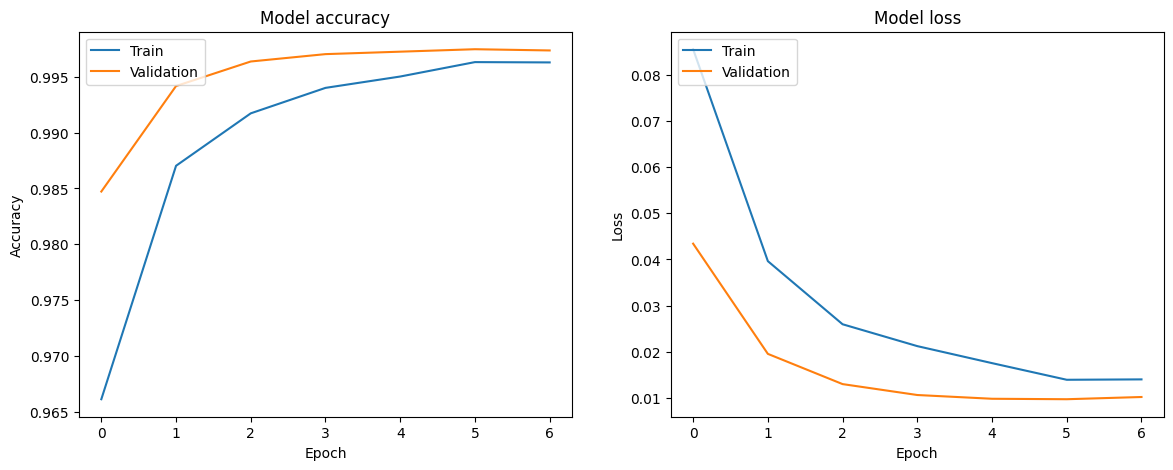

In [ ]:
# Plotting training & validation accuracy values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Model Predictions
y_pred_prob = best_mlp_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

eval_result = best_mlp_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      5653
     Class 1       1.00      1.00      1.00      5720

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0097
Test Loss: 0.008916324935853481, Test Accuracy: 0.9978018403053284


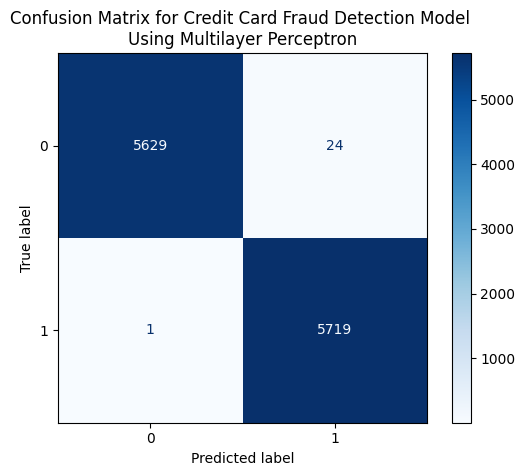

In [ ]:
# Confusion matrix for MLP
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Credit Card Fraud Detection Model \nUsing Multilayer Perceptron')
plt.show()

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC Score for Hypertuned CNN: {auc_score}')

AUC Score for Hypertuned CNN: 0.9977898207400241


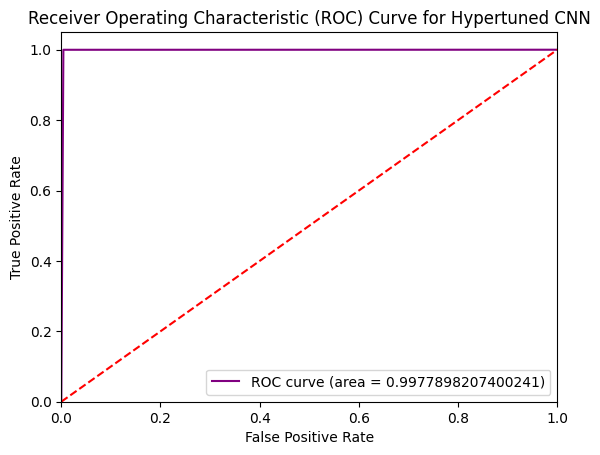

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Hypertuned CNN')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Saving the models
best_mlp_model.save("mlp_model.h5", include_optimizer=True)

In [ ]:
# Saving the models
best_model_cnn.save("cnn_model3.h5", include_optimizer=True)